In [2]:
import re
import os
# add the parent directory to the path
import sys
sys.path.append('../../')
from fears.utils import AutoRate
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import seaborn as sns
import pandas as pd
import calibration_08302023 as cal
from utils import *

file_path = '../experiment_data/supernatant_validation_01222023/EK_single_AB_constant_gain_20240122_124942.xlsx'

replicates = ['2','3','4']

# These functions help with sorting the file names in natural order
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]


rfu30_to_dilution = cal.run()

In [3]:
# p = AutoRate.Plate(file_path,mode='single_measurement')
# data = p.od_data_to_dict(p.data)

# rfu_dict = {}
# cell_count_dict = {}

# for key in exp_layout.keys():
#     row = exp_layout[key]

#     data_t = []
#     for col in replicates:
#         data_t.append(data[row+col])

#     rfu_dict[key] = data_t
#     cell_count_dict[key] = rfu30_to_dilution(data_t,background_subtracted=False)

In [ ]:
file_path = '../experiment_data/supernatant_validation_01222023/EK_single_AB_constant_gain_20240122_124942.xlsx'

exp_layout = {'media':'B',
              'drug':'C',
              'cells + centrifuge':'D',
              'cells + no centrifuge':'E',
              'cells + centrifuge + drug':'F',
              'cells + no centrifuge + drug':'G'}

p = AutoRate.Plate(file_path,mode='single_measurement')
data = p.od_data_to_dict(p.data)

rfu_dict = {}
cell_count_dict = {}

for key in exp_layout.keys():
    row = exp_layout[key]

    data_t = []
    for col in replicates:
        data_t.append(data[row+col])

    rfu_dict[key] = data_t
    cell_count_dict[key] = rfu30_to_dilution(data_t,background_subtracted=False)

observations = []

for condition,values in cell_count_dict.items():
    # interpret the condition string
    if 'no centrifuge' in condition:
        spin = False
    else:
        spin = True
    if 'drug' in condition:
        drug = True
    else:
        drug = False
    if 'media' in condition:
        media = True
    else:
        media = False


    for i,replicate in enumerate(values):
        observations.append({'condition':condition,
                                'spin':spin,
                                'drug':drug,
                                'media':media,
                             'replicate':i,
                             'cell count':replicate,
                             'time':1})
        
file_path = '../experiment_data/supernatant_validation_01222023/EK_single_AB_constant_gain_20240122_154333.xlsx'

exp_layout = {'cells + centrifuge':'B',
              'cells + no centrifuge':'C',
              'cells + centrifuge + drug':'D',
              'cells + no centrifuge + drug':'E'}

p = AutoRate.Plate(file_path,mode='single_measurement')
data = p.od_data_to_dict(p.data)

rfu_dict = {}
cell_count_dict = {}

for key in exp_layout.keys():
    row = exp_layout[key]

    data_t = []
    for col in replicates:
        data_t.append(data[row+col])

    rfu_dict[key] = data_t
    cell_count_dict[key] = rfu30_to_dilution(data_t,background_subtracted=False)

for condition,values in cell_count_dict.items():
    # interpret the condition string
    if 'no centrifuge' in condition:
        spin = False
    else:
        spin = True
    if 'drug' in condition:
        drug = True
    else:
        drug = False
    if 'media' in condition:
        media = True
    else:
        media = False


    for i,replicate in enumerate(values):
        observations.append({'condition':condition,
                                'spin':spin,
                                'drug':drug,
                                'media':media,
                             'replicate':i,
                             'cell count':replicate,
                             'time':3})



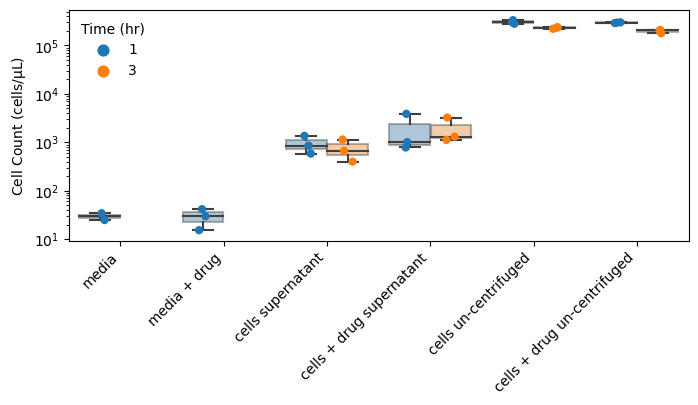

In [9]:
df = pd.DataFrame(observations)

order = ['media','drug','cells + centrifuge','cells + centrifuge + drug', 'cells + no centrifuge', 'cells + no centrifuge + drug']

fig,ax = plt.subplots(figsize=(8,3))

ax = sns.stripplot(data=df,x='condition',y='cell count',hue='time',jitter=True,
                   palette='tab10',dodge=True,s=6,order=order,ax=ax)

ax = sns.boxplot(data=df,x='condition',y='cell count',hue='time',palette='tab10',
                 boxprops={'alpha': 0.4},order=order,ax=ax)

# labels = rfu_dict.keys()
# labels = df['condition'].unique()
labels = ['media','media + drug', 'cells supernatant','cells + drug supernatant','cells un-centrifuged','cells + drug un-centrifuged']
ax.set_xticklabels(labels,rotation=45,ha='right')

# get legend handles and labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:2],labels=labels[0:2],frameon=False,title='Time (hr)')

ax.set_yscale('log')

ax.set_ylabel('Cell Count (cells/$\mathrm{\mu}}$L)')
ax.set_xlabel('')

fig.savefig('../../figures/supernatant_validation_01222023.pdf',bbox_inches='tight')

In [ ]:
# df = pd.DataFrame(rfu_dict)

# fig,ax = plt.subplots()

# ax = sns.stripplot(data=df,ax=ax,size=7)

# ax = sns.boxplot(data=df,ax=ax,boxprops=dict(alpha=.5))

# ax.set_yscale('log')

# labels = rfu_dict.keys()

# ax.set_xticks(np.arange(len(labels)))

# ax.set_xticklabels(labels,rotation=45,ha='right',fontsize=12)

# # perform pairwise statistical test using scipy

# # stats.ttest_ind(braf_exp_dict[key]['vect'],braf_exp_dict[key2]['vect'],equal_var=False).pvalue

# # cells no spin vs cells no spin with drug

# pval = stats.ttest_ind(rfu_dict['cells no spin'],rfu_dict['cells no spin with drug'],equal_var=False).pvalue


In [ ]:
# df = pd.DataFrame(cell_count_dict)

# fig,ax = plt.subplots()

# ax = sns.stripplot(data=df,ax=ax,size=7)

# ax = sns.boxplot(data=df,ax=ax,boxprops=dict(alpha=.5))

# ax.set_yscale('log')

# labels = rfu_dict.keys()

# ax.set_xticks(np.arange(len(labels)))

# ax.set_xticklabels(labels,rotation=45,ha='right',fontsize=12)

# # perform pairwise statistical test using scipy

# # stats.ttest_ind(braf_exp_dict[key]['vect'],braf_exp_dict[key2]['vect'],equal_var=False).pvalue

# # cells no spin vs cells no spin with drug

# pval = stats.ttest_ind(rfu_dict['cells no spin'],rfu_dict['cells no spin with drug'],equal_var=False).pvalue

# ax.set_ylabel('Estimated cell count (cells/mL)',fontsize=12)


In [ ]:
# exp_conditions_dict = {'cells spin 1hr':cell_count_dict['cells spin'],
#                        'cell spin with drug 1hr':cell_count_dict['cells spin with drug'],
#                        'cells no spin 1hr':cell_count_dict['cells no spin'],
#                        'cells no spin with drug 1hr':cell_count_dict['cells no spin with drug']}

In [ ]:
# # 3 hr timepoint

# file_path = '../experiment_data/supernatant_validation_01222023/EK_single_AB_constant_gain_20240122_154333.xlsx'

# p = AutoRate.Plate(file_path,mode='single_measurement')
# data = p.od_data_to_dict(p.data)

# exp_layout = {'cells + centrifuge':'B',
#               'cell + no centrifuge':'C',
#               'cells + centrifuge + drug':'D',
#               'cells + no centrifuge + drug':'E'}

# rfu_dict = {}
# cell_count_dict = {}

# for key in exp_layout.keys():
#     row = exp_layout[key]

#     data_t = []
#     for col in replicates:
#         data_t.append(data[row+col])

#     rfu_dict[key] = data_t
#     cell_count_dict[key] = rfu30_to_dilution(data_t,background_subtracted=False)

# df = pd.DataFrame(cell_count_dict)

# fig,ax = plt.subplots()

# ax = sns.stripplot(data=df,ax=ax,size=7)

# ax = sns.boxplot(data=df,ax=ax,boxprops=dict(alpha=.5))

# ax.set_yscale('log')

# labels = rfu_dict.keys()

# ax.set_xticks(np.arange(len(labels)))

# ax.set_xticklabels(labels,rotation=45,ha='right',fontsize=12)

# # perform pairwise statistical test using scipy

# # stats.ttest_ind(braf_exp_dict[key]['vect'],braf_exp_dict[key2]['vect'],equal_var=False).pvalue

# # cells no spin vs cells no spin with drug

# pval = stats.ttest_ind(rfu_dict['cells + centrifuge'],rfu_dict['cells + centrifuge + drug'],equal_var=False).pvalue

# ax.set_ylabel('Estimated cell count (cells/mL)',fontsize=12)

# ax.set_title('3 hr timepoint',fontsize=14)


In [ ]:
# exp_conditions_dict['cells spin 3hr'] = cell_count_dict['cells + centrifuge']
# exp_conditions_dict['cell spin with drug 3hr'] = cell_count_dict['cells + centrifuge + drug']
# exp_conditions_dict['cells no spin 3hr'] = cell_count_dict['cell + no centrifuge']
# exp_conditions_dict['cells no spin with drug 3hr'] = cell_count_dict['cells + no centrifuge + drug']

In [ ]:
# df = pd.DataFrame(exp_conditions_dict)

# fig,ax = plt.subplots()

# # order = ['cells spin 1hr','cells spin 3hr','cell spin with drug 1hr','cell spin with drug 3hr']

# order = ['cells spin 1hr','cells spin 3hr','cell spin with drug 1hr','cell spin with drug 3hr',
#             'cells no spin 1hr','cells no spin 3hr','cells no spin with drug 1hr','cells no spin with drug 3hr']

# ax = sns.stripplot(data=df,ax=ax,size=7,order=order,hue_order=order)

# ax = sns.boxplot(data=df,ax=ax,boxprops=dict(alpha=.5),order=order,hue_order=order)
# # ax = sns.stripplot(data=df,ax=ax,size=7)

# # ax = sns.boxplot(data=df,ax=ax,boxprops=dict(alpha=.5))

# # labels = ['no drug 1hr','no drug 3hr','drug 1hr','drug 3hr']

# # ax.set_xticklabels(labels,rotation=45,ha='right',fontsize=12)

# xt = ax.get_xticklabels()
# ax.set_xticklabels(xt,rotation=45,ha='right',fontsize=12)

# ax.set_ylabel('Estimated cell count (cells/mL)',fontsize=12)

# # plot the mean

# for i,key in enumerate(order):
#     ax.plot(i,np.mean(df[key]),'*',color='black',markersize=7,label='mean')


# # show unique legend entries
# handles, labels = ax.get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# ax.legend(by_label.values(), by_label.keys(),frameon=False)

# ax.set_yscale('log')